# Importing dependencies and data

In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy
from tqdm import tqdm
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import string
%matplotlib inline



#other dependencies have been imported as and when required

In [82]:
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 751.6 kB/s eta 0:00:17
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.6/12.8 MB 2.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.8 MB 2.5 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2.6 MB/

In [2]:
#importing the datasets
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
                

# EXPLORATORY DATA ANALYSIS ON THE DATASET

In [3]:
#describe the dataset
train_df.head(5)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
train_df.shape

(1804874, 45)

In [5]:
train_df.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


We can see, there are 45 columns (including the target column)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [7]:
import seaborn as sns

In [8]:
missing_values=train_df.isnull().sum()
print(missing_values)

id                                           0
target                                       0
comment_text                                 3
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

Datapoints without comment_text information is basically useless to us, and since they are only 3 in number, we can just drop those rows from our dataset.

In [9]:
train_df=train_df.dropna(subset=['comment_text'])

In [10]:
missing_values=train_df.isnull().sum()
print(missing_values)

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399743
atheist                                1399743
bisexual                               1399743
black                                  1399743
buddhist                               1399743
christian                              1399743
female                                 1399743
heterosexual                           1399743
hindu                                  1399743
homosexual_gay_or_lesbian              1399743
intellectual_or_learning_disability    1399743
jewish                                 1399743
latino                                 1399743
male         

In [11]:
train_df['parent_id']=train_df['parent_id'].fillna(-1)

In [12]:
train_df['is_reply']= train_df['parent_id'].apply(lambda x: 0 if x==-1 else 1)

In [13]:
train_df.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,is_reply
count,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,405128.000000,405128.000000,405128.000000,...,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06,1.804871e+06
mean,3.738433e+06,1.030175e-01,4.582106e-03,1.387723e-02,2.263575e-02,8.115287e-02,9.311287e-03,0.011964,0.003205,0.001884,...,2.813597e+05,2.779246e-01,4.420704e-02,1.091175e-01,2.446166e+00,5.843692e-01,6.605985e-03,1.439017e+00,8.784702e+00,5.685863e-01
std,2.445187e+06,1.970759e-01,2.286130e-02,6.460424e-02,7.873162e-02,1.760658e-01,4.942222e-02,0.087166,0.050193,0.026077,...,1.039293e+05,1.055308e+00,2.449361e-01,4.555366e-01,4.727925e+00,1.866590e+00,4.529785e-02,1.787042e+01,4.350090e+01,4.952737e-01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
25%,7.969740e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03,1.000000e+00


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804871 entries, 0 to 1804873
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                         

In [15]:
reply_toxicity = train_df.groupby('is_reply')['target'].mean()
reply_toxicity

is_reply
0    0.108703
1    0.098703
Name: target, dtype: float64

In [16]:
reply_count=train_df['is_reply'].value_counts()
reply_count

is_reply
1    1026225
0     778646
Name: count, dtype: int64

# Now, we try analysing the target column

In [17]:
target_count=train_df['target'].value_counts()
target_count

target
0.000000    1264761
0.166667     138501
0.200000     107492
0.300000      59098
0.400000      50013
             ...   
0.026684          1
0.924561          1
0.007458          1
0.145161          1
0.870088          1
Name: count, Length: 2913, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


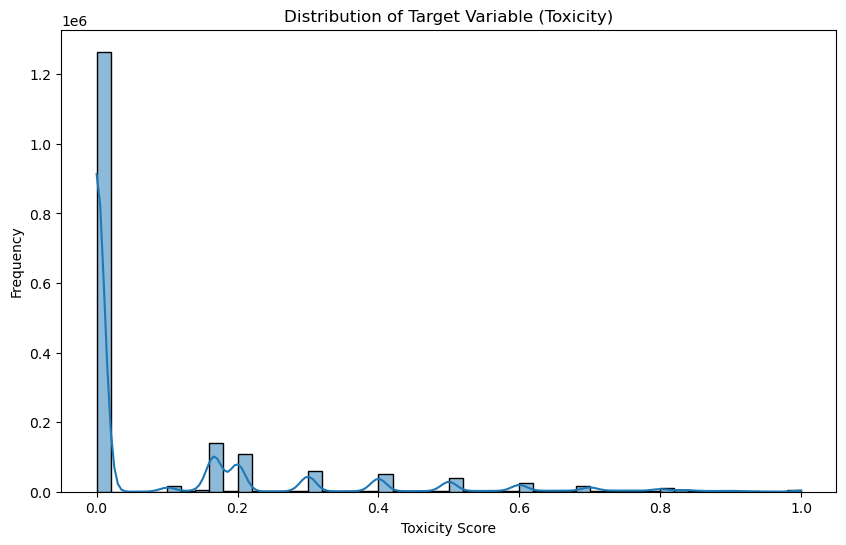

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['target'], bins=50, kde=True)
plt.title('Distribution of Target Variable (Toxicity)')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

Thus, we can see that most of the comments are non-toxic ( which have a toxicity score of 0)

In [19]:
#creating a temporary copy where we look at the problem statement from a classification task Point of View.
temp = train_df['target'].apply(lambda x: "toxic" if x > 0.5 else "non_toxic")
counts=temp.value_counts()
percentages = counts / counts.sum() * 100

print("counts:",counts,"\n")
print("percentages:",percentages)

counts: target
non_toxic    1698433
toxic         106438
Name: count, dtype: int64 

percentages: target
non_toxic    94.102736
toxic         5.897264
Name: count, dtype: float64


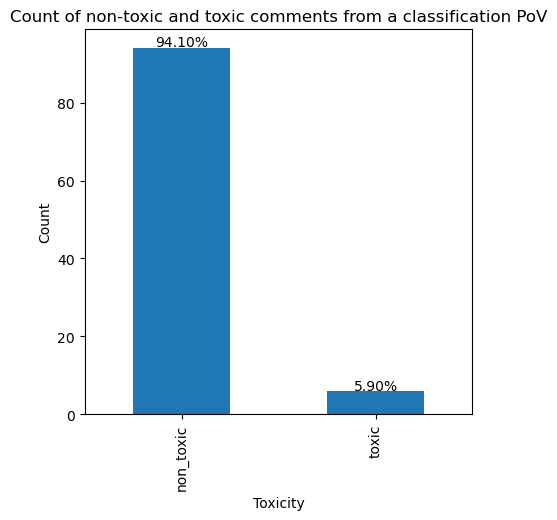

In [20]:
#plotting the toxic and non-toxic comments with their percentages
fig, ax=plt.subplots(1,1,figsize=(5,5))
percentages.plot(kind='bar', ax=ax)
ax.set_title('Count of non-toxic and toxic comments from a classification PoV')
ax.set_xlabel('Toxicity')
ax.set_ylabel('Count')

# Annotate with percentages for better understanding
for i, percentage in enumerate(percentages):
    ax.text(i, percentage + 0.3, '{:.2f}%'.format(percentage), ha='center')

plt.show()

# Looking for subfeatures in the Dataset:
1. severe_toxicity
2. obscene
3. identity_attack
4. insult
5. threat

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1804871 entries, 0 to 1804873
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                         

# Finding their correlation:

In [22]:
subset_df = train_df[['target','severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']]
subset_df.head()

,target,severe_toxicity,obscene,threat,insult,identity_attack
0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
1,0.000000,0.000000,0.0,0.0,0.00000,0.000000
2,0.000000,0.000000,0.0,0.0,0.00000,0.000000
3,0.000000,0.000000,0.0,0.0,0.00000,0.000000
4,0.893617,0.021277,0.0,0.0,0.87234,0.021277


In [23]:
cor=subset_df.corr()
cor

,target,severe_toxicity,obscene,threat,insult,identity_attack
target,1.000000,0.393425,0.493058,0.287760,0.928207,0.450017
severe_toxicity,0.393425,1.000000,0.340570,0.277789,0.324847,0.256599
obscene,0.493058,0.340570,1.000000,0.090928,0.427176,0.124823
threat,0.287760,0.277789,0.090928,1.000000,0.108575,0.146662
insult,0.928207,0.324847,0.427176,0.108575,1.000000,0.310748
identity_attack,0.450017,0.256599,0.124823,0.146662,0.310748,1.000000


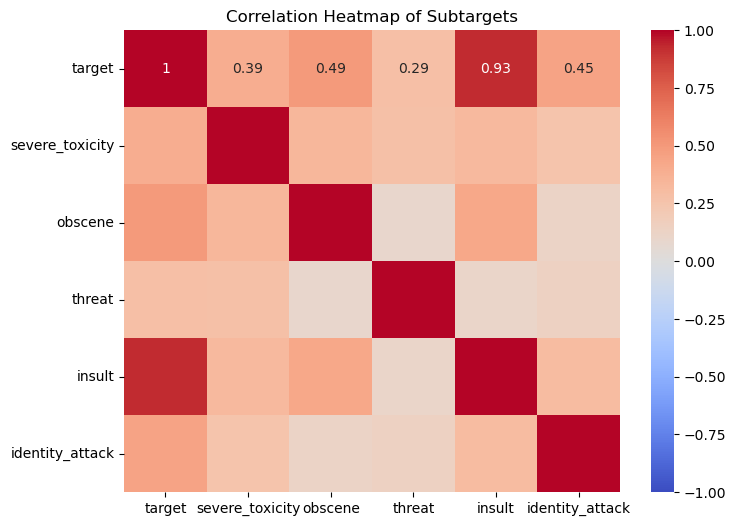

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Subtargets')
plt.show()

Conclusion: Thus we can say that the target variables are not independent, they are correlated.

In [25]:
# Needed distribution - distplot is deprecated , so I try plotting the observation with kde plot.
def plot_features_distribution(features, title, data):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.kdeplot(data[feature],label=feature,fill=False)
    plt.xlabel('')
    plt.legend()
    plt.show()

Please ignore the warnings!

1)))) First, trying to observe the distribution of different types of toxic comments in the overall dataset:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

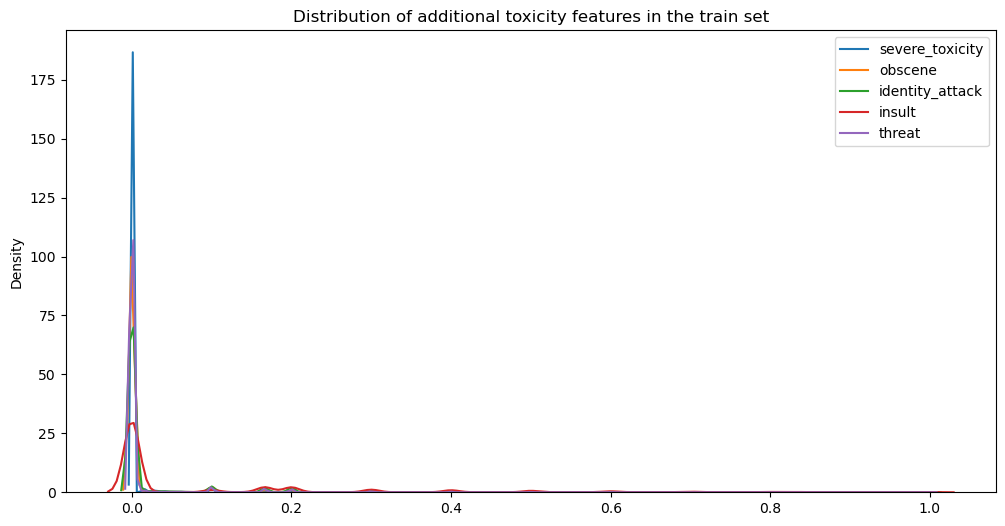

In [26]:
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
plot_features_distribution(features, "Distribution of additional toxicity features in the train set", train_df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

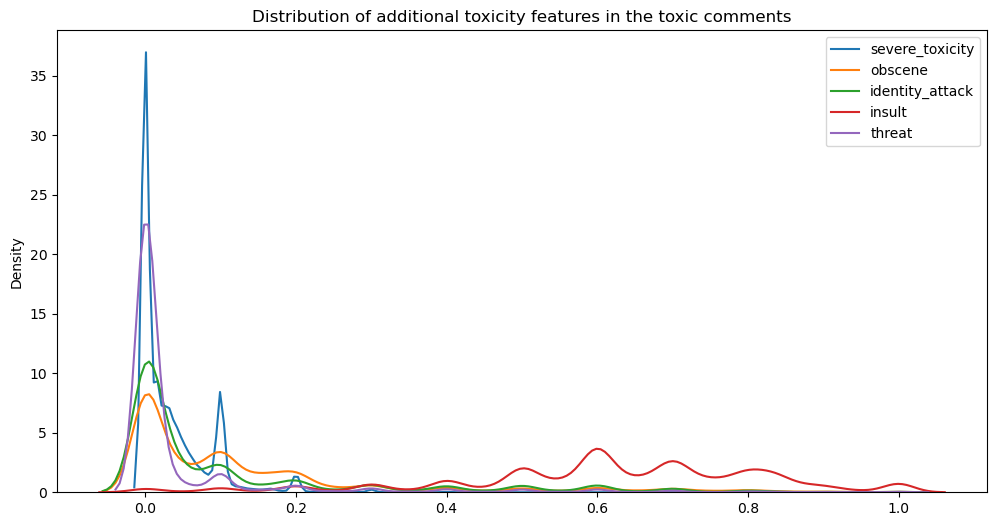

In [27]:
temp=train_df[train_df['target']>0.5]
plot_features_distribution(features, "Distribution of additional toxicity features in the toxic comments", temp)

Observation: Among toxic comments, most of them are insulting. Let us cross verify the observation by plotting bar graphs.

In [28]:
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
counts={}
for feature in features:
    count=(temp[feature] > 0.5).sum()
    counts[feature]=count

counts_df = pd.DataFrame({
    'Category': list(counts.keys()),
    'Count': list(counts.values())})

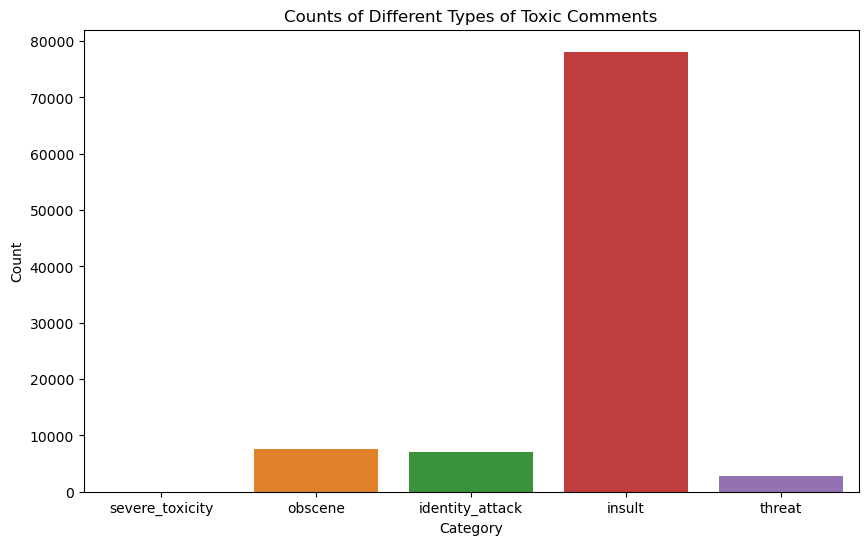

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=counts_df)
plt.title('Counts of Different Types of Toxic Comments')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Thus we can see, that among the comments that are actually considered toxic, most of them are insults as compared to others.

## Identity Features
- Male
- Female
- homosexual_gay_or_lesbian
- bisexual
- heterosexual
- christian
- jewish
- muslim
- black
- white
- asian
- latino

In [30]:
#create a temporary dataframe removing all the rows where any of the columns is missing
temp2=train_df.dropna(axis=0,how='any')
temp.shape

(106438, 46)

In [31]:
train_df.shape

(1804871, 46)

Approximately 80,000 datapoints got removed due to one or more missing feature values

1. Let us look at the distribution of different genders in the comments

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

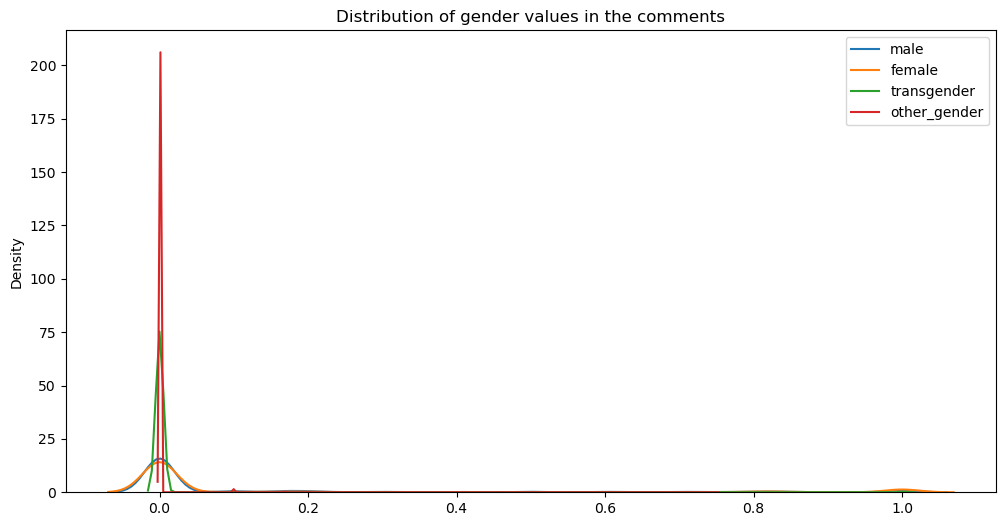

In [32]:
features=['male','female','transgender','other_gender']
plot_features_distribution(features, "Distribution of gender values in the comments", temp2)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

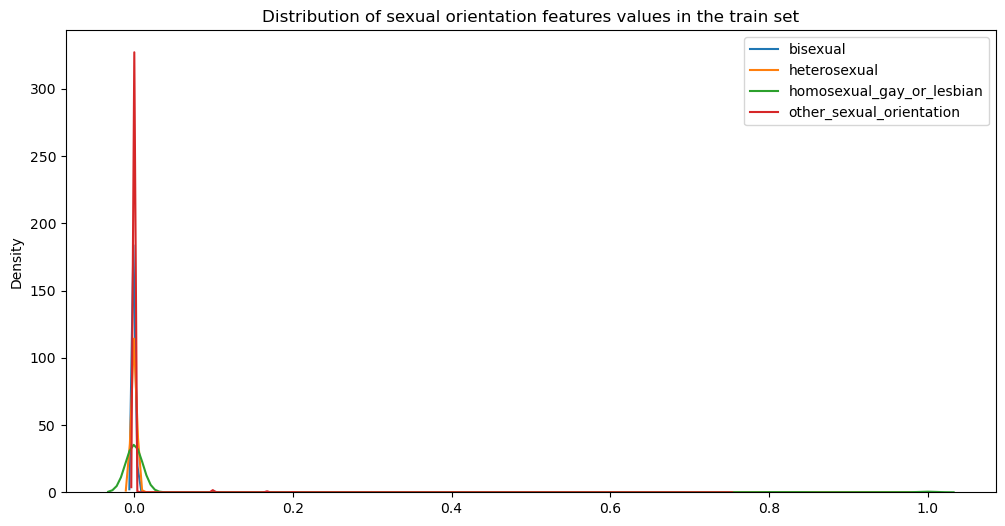

In [33]:
features = ['bisexual', 'heterosexual', 'homosexual_gay_or_lesbian', 'other_sexual_orientation']
plot_features_distribution(features, "Distribution of sexual orientation features values in the train set", temp2)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

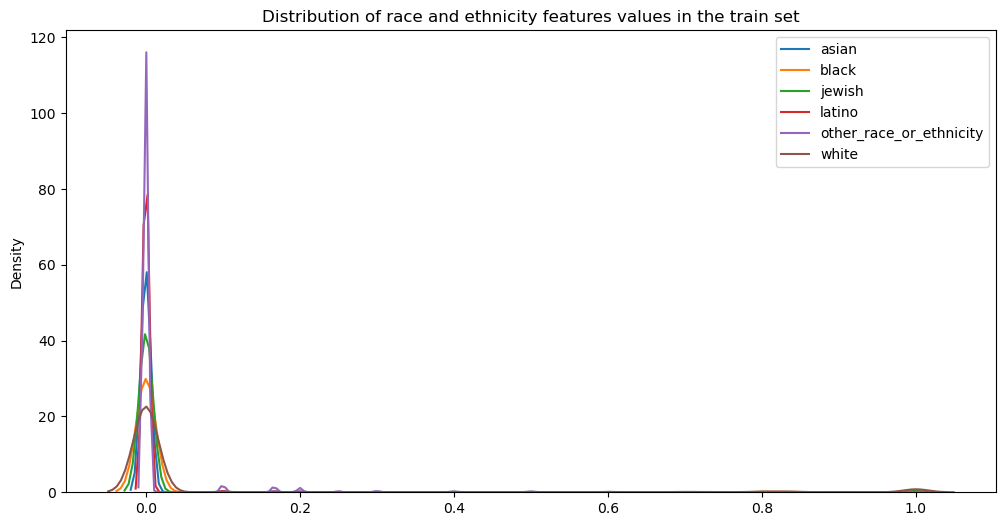

In [34]:
features = ['asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white']
plot_features_distribution(features, "Distribution of race and ethnicity features values in the train set", temp2)

In [35]:
#building a function that returns the nature of a particular toxic comment ( condition is that is should be some kind of toxic)
def get_comment_nature(row):
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat']]
    index =np.argmax(np.array(row))
    if index==0 : return 'severe_toxicity' 
    elif index==1 : return 'obscene'
    elif index==2 : return 'identity_attack'
    elif index==3 : return 'insult'
    else : return 'threat'

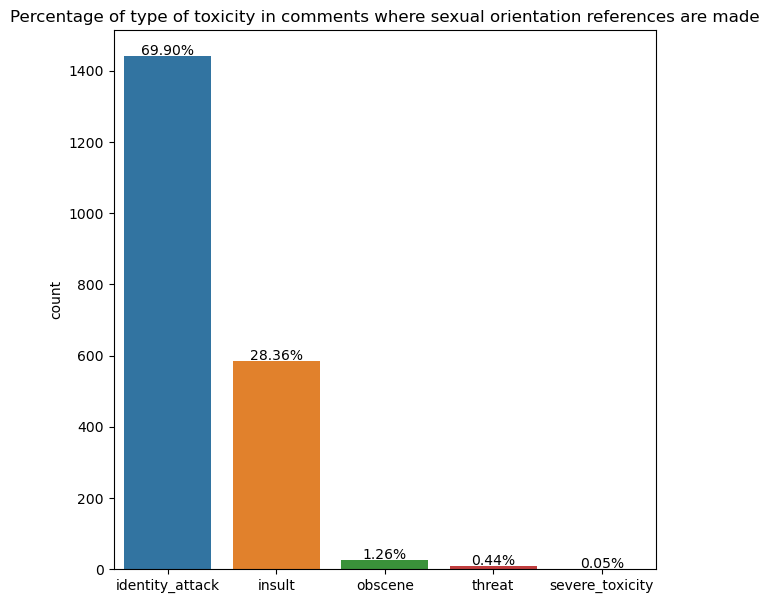

In [36]:
#get data where sexual orientation comments are made
cond = (train_df['bisexual'] > 0.5) | (train_df['heterosexual'] > 0.5) | (train_df['homosexual_gay_or_lesbian'] > 0.5) | (train_df['other_sexual_orientation'] > 0.5)
temp=train_df[cond]
temp=temp[temp['target']> 0.5] # selecting only the comments that are actually toxic + gender comments are made

x=temp.apply(get_comment_nature,axis=1)
#temp.head()
#x.head()

fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

# Plot the count plot.
cntplot = sns.countplot(x=x,ax=ax)
cntplot.set_title('Percentage of type of toxicity in comments where sexual orientation references are made')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()


Thus we can see that mostly the toxic comments where sexual orientation references are made come under the category of identity_attack.

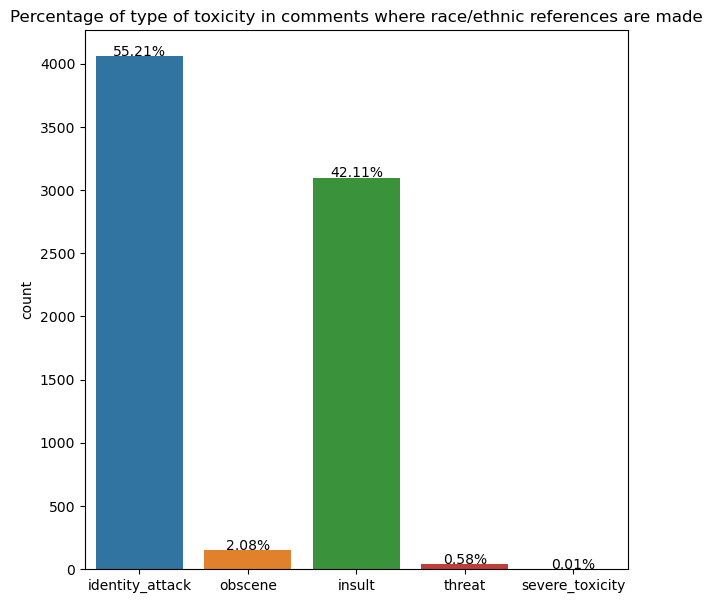

In [37]:
#get data where race/ethnicity comments are made
cond = (train_df['asian'] > 0.5) | (train_df['black'] > 0.5) | (train_df['jewish'] > 0.5) | (train_df['latino'] > 0.5) | (train_df['white'] > 0.5)
temp=train_df[cond]
temp =temp[temp['target']>0.5]

x=temp.apply(get_comment_nature,axis=1)
#x.head()
#temp.head()

fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

# Plot the count plot.
cntplot = sns.countplot(x=x,ax=ax)
cntplot.set_title('Percentage of type of toxicity in comments where race/ethnic references are made')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

We can observe that toxic comments that include racial/ethnicity comments mostly fall under the category of identitty attack or insult.

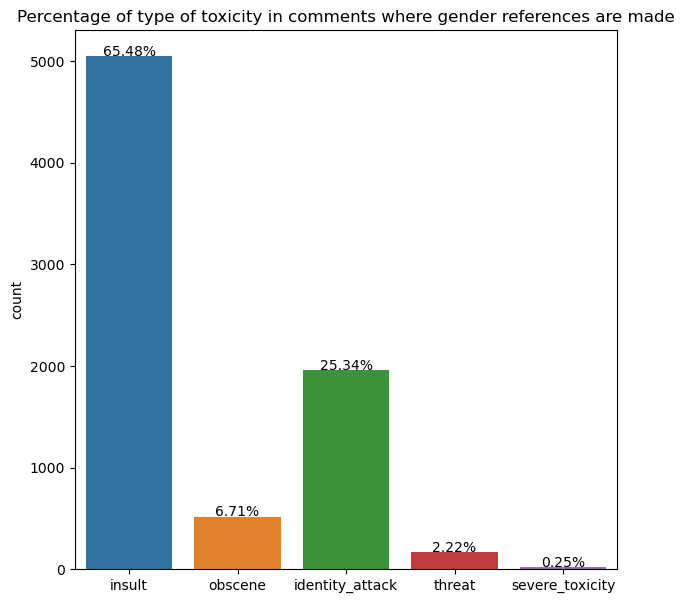

In [38]:
#comments where gender references are made ( male / female , etc)
cond= (train_df['male'] > 0.5) | (train_df['female'] > 0.5) | (train_df['transgender'] > 0.5) | (train_df['other_gender'] > 0.5)
temp=train_df[cond]
temp=temp[temp['target']>0.5] #again choosing only the toxic comments

x=temp.apply(get_comment_nature, axis=1)

fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

#plot the count plot
cntplot = sns.countplot(x=x,ax=ax)
cntplot.set_title('Percentage of type of toxicity in comments where gender references are made')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

Thus we can see that toxic comments that include gender references are mostly Insults in nature.

## EDA on User feedback features.
- funny
- sad
- wow
- likes
- disagree

In [39]:
user_feedback_features = ['funny', 'sad', 'wow', 'likes', 'disagree']
summary_statistics = train_df[user_feedback_features].describe()
print(summary_statistics)

              funny           sad           wow         likes      disagree
count  1.804871e+06  1.804871e+06  1.804871e+06  1.804871e+06  1.804871e+06
mean   2.779246e-01  1.091175e-01  4.420704e-02  2.446166e+00  5.843692e-01
std    1.055308e+00  4.555366e-01  2.449361e-01  4.727925e+00  1.866590e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00
max    1.020000e+02  3.100000e+01  2.100000e+01  3.000000e+02  1.870000e+02


Analysing reactions in all comments ( toxic as well as non toxic)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

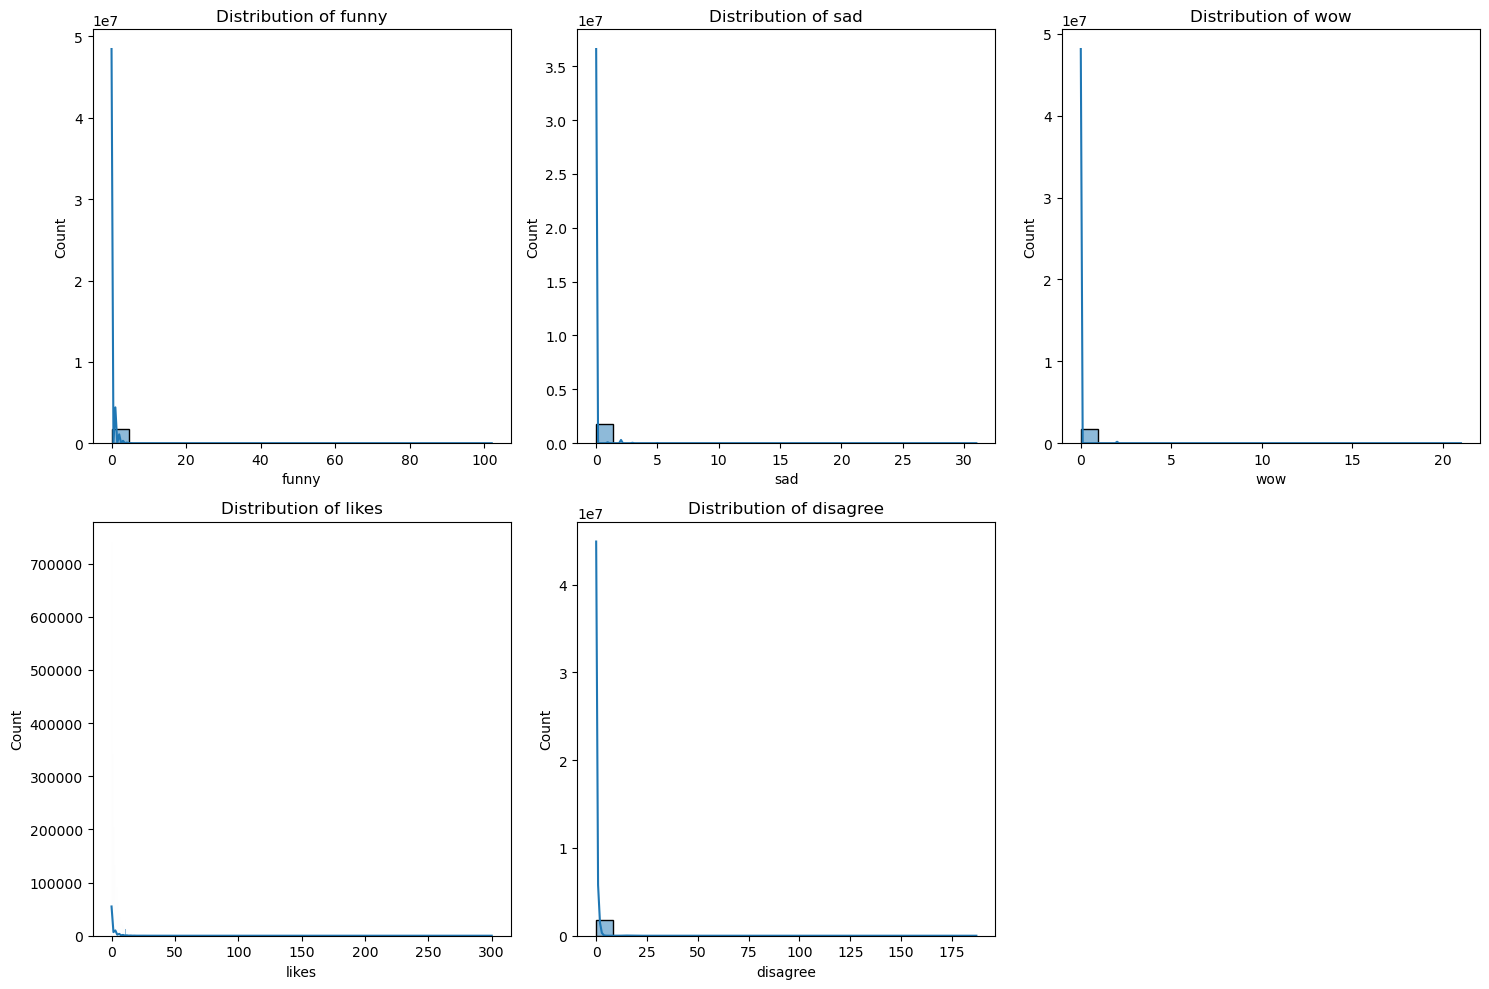

In [40]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(user_feedback_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Thus we can see that most of the comments received very few reactions ( true for all kinds of reactions). Most of the tweets received reactions close to 0 only.

Analysing reactions in toxic comments only.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

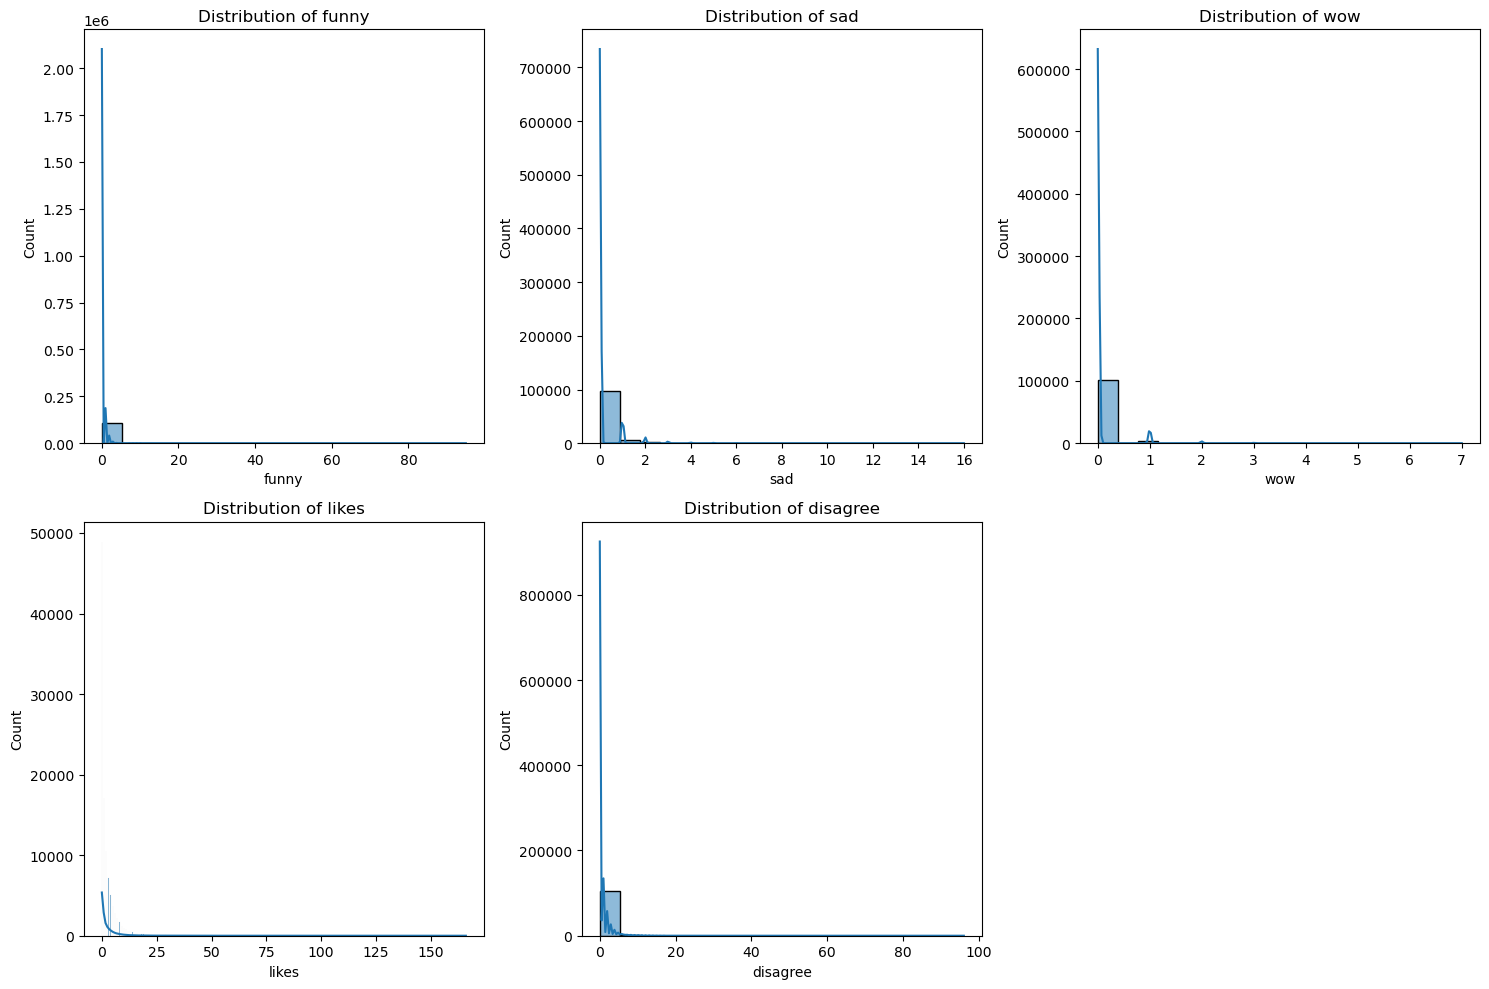

In [41]:
temp=train_df[train_df['target']>0.5]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(user_feedback_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(temp[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Here also we can see that the distribution remains mostly same as before ( most tweets receiving close to 0 reactions ).

In [42]:
#analysing average user feedback for toxic vs non-toxic comments
grouped_analysis=train_df.groupby(train_df['target']>0.5)[user_feedback_features].mean()
print(grouped_analysis)

           funny       sad       wow     likes  disagree
target                                                  
False   0.280120  0.108578  0.043979  2.447138  0.582420
True    0.242893  0.117721  0.047840  2.430654  0.615466


This analysis shows that the average feedback remained same for both toxic and non toxic comments, so there is not point in finding correlations between these features and target.

Observation
- For all the feedback features, most of the comments received 0 reactions and very few of them received non-zero reactions. This was true for both toxic and non toxic comments, hence these features are not that useful in determining whether the comment is toxic or non-toxic.

# Some more statistical explorations


- Average character length of toxic and non toxic comments.

In [51]:
train_df['comment_length']=train_df['comment_text'].apply(lambda x: len(x))
toxic_comments=train_df[train_df['target']>0.5]
non_toxic_comments=train_df[train_df['target']<=0.5]

In [52]:
avg_toxic_length = toxic_comments['comment_length'].mean()
avg_non_toxic_length = non_toxic_comments['comment_length'].mean()

print(f'Average length of toxic comments: {avg_toxic_length}')
print(f'Average length of non-toxic comments: {avg_non_toxic_length}')

Average length of toxic comments: 252.8707510475582
Average length of non-toxic comments: 300.01503680156947


- Average number of exclamations in toxic and non toxic comments

In [55]:
train_df['exclamation'] = train_df.comment_text.apply(lambda s: len([c for c in s if c == '!']))

In [56]:
toxic_comments=train_df[train_df['target']>0.5]
non_toxic_comments=train_df[train_df['target']<=0.5]

avg_toxic_exc=toxic_comments['exclamation'].mean()
avg_non_toxic_exc=non_toxic_comments['exclamation'].mean()

print(f'Average number of exclamations in toxic comments :{ avg_toxic_exc}')
print(f'Average number of exclamations in non-toxic comments : {avg_non_toxic_exc}')

Average number of exclamations in toxic comments :0.3984948984385276
Average number of exclamations in non-toxic comments : 0.21415799151335377


Observations:

- Toxic comments are slightly shorter in length than non toxic comments.
- Toxic comments have more number of exclamations than non toxic comments.

# Comment_text features

- Wordclouds for different target and sub-target features ( Showing prevalent words in each type of comment)

In [62]:
stpwrds=set(STOPWORDS)

def plot_wordcloud(data, title = None):
    wc=WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=50,
        max_font_size=40,
        scale=5,
        random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wc)
    plt.show()

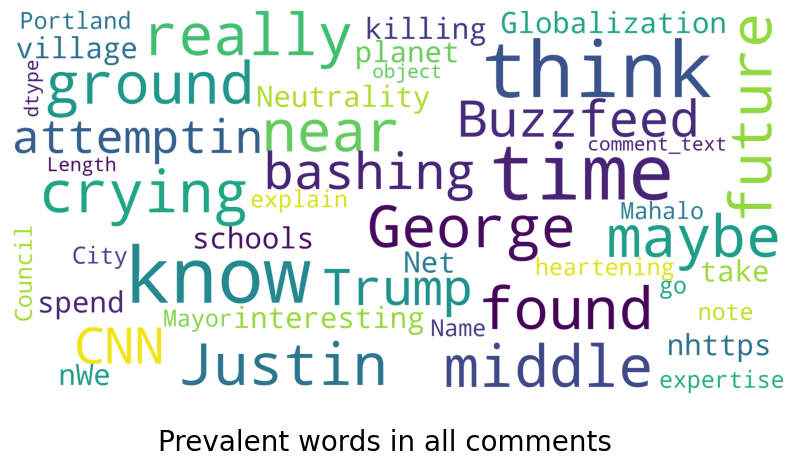

In [63]:
plot_wordcloud(train_df['comment_text'].sample(25000),title= 'Prevalent words in all comments')

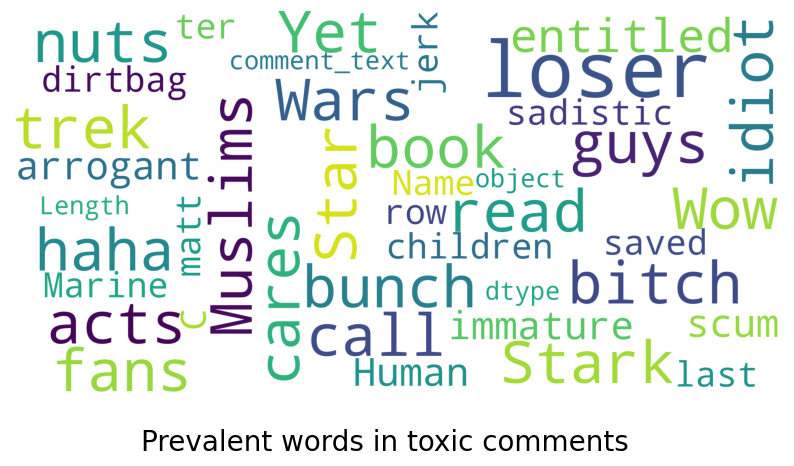

In [73]:
plot_wordcloud(train_df.loc[train_df['target']>0.75]['comment_text'],title= 'Prevalent words in toxic comments')

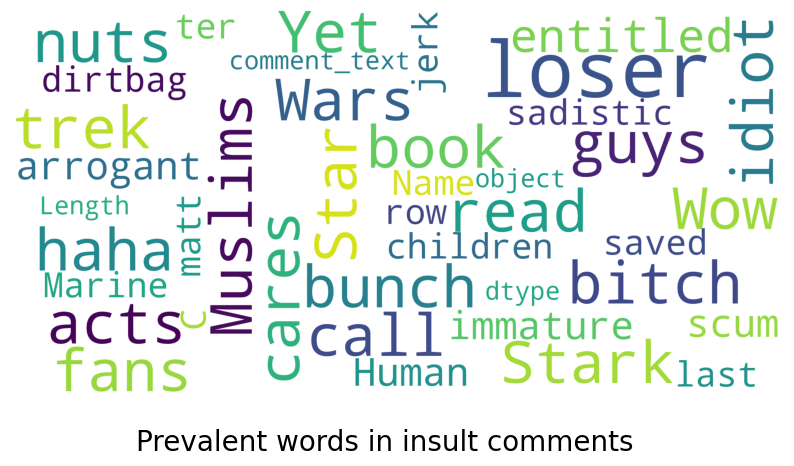

In [74]:
plot_wordcloud(train_df.loc[train_df['insult']>0.75]['comment_text'],title= 'Prevalent words in insult comments')

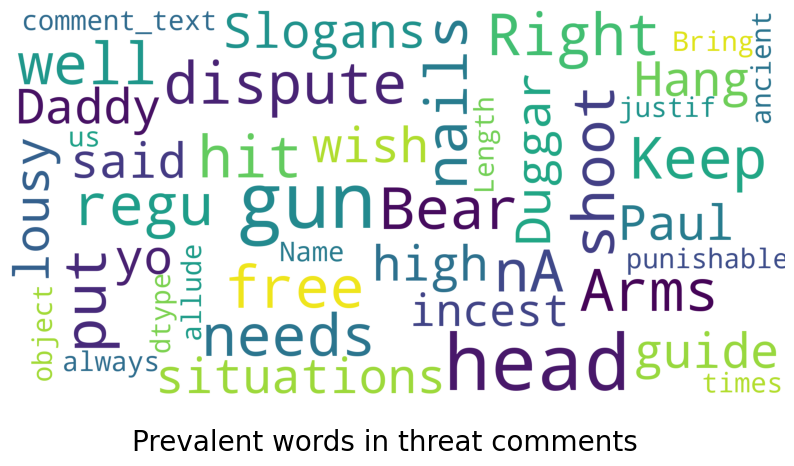

In [68]:
plot_wordcloud(train_df.loc[train_df['threat']>0.75]['comment_text'],title= 'Prevalent words in threat comments')

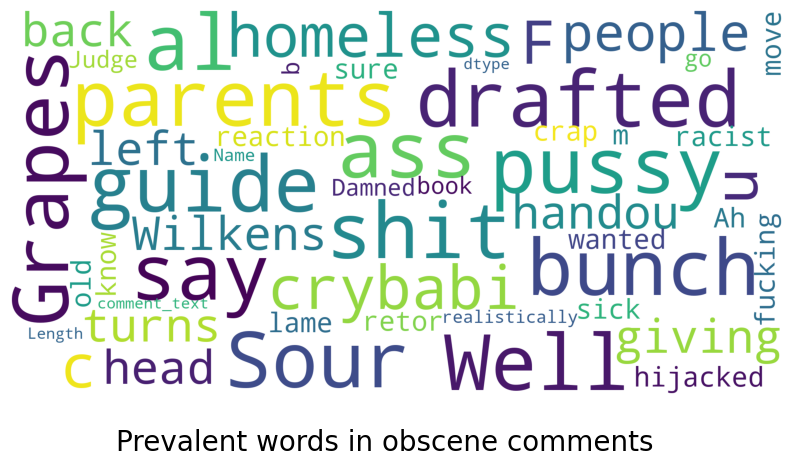

In [69]:
plot_wordcloud(train_df.loc[train_df['obscene']>0.75]['comment_text'],title= 'Prevalent words in obscene comments')

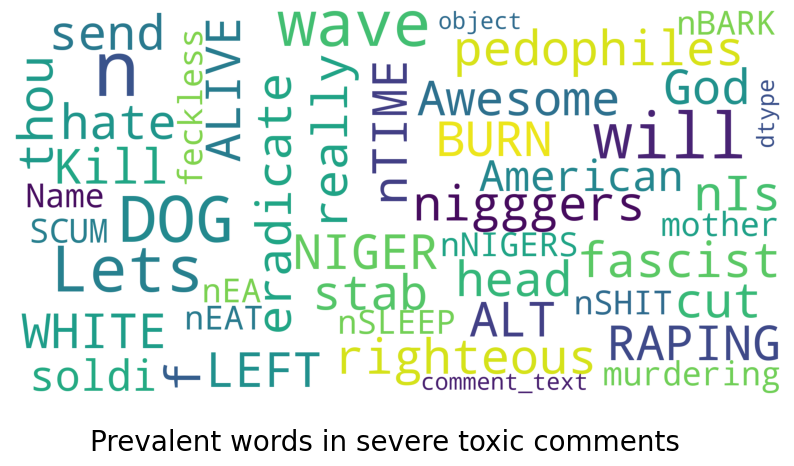

In [71]:
plot_wordcloud(train_df.loc[train_df['severe_toxicity']>0.5]['comment_text'],title= 'Prevalent words in severe toxic comments')

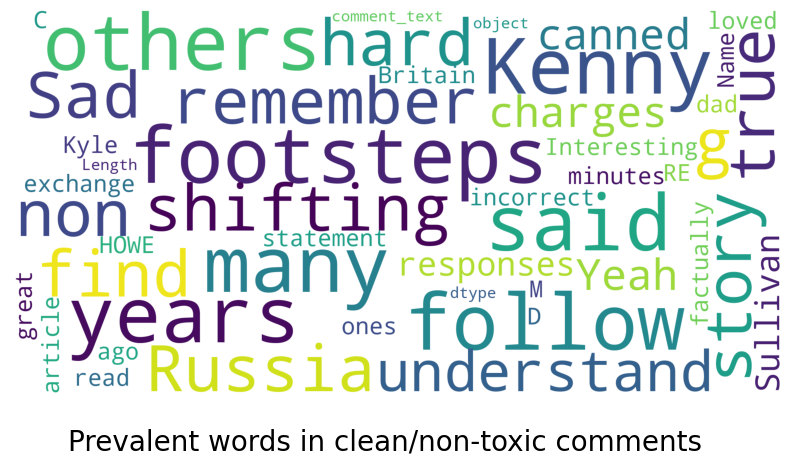

In [75]:
plot_wordcloud(train_df.loc[train_df['target']<0.25]['comment_text'].sample(50000),title= 'Prevalent words in clean/non-toxic comments')

# POS Tagging for additional insights and EDA

- Added tqdm progress bar for additional interactivity( understanding of rate of processing, time taken, tracking progress , etc)

In [83]:
nlp=spacy.load('en_core_web_sm')

In [94]:
def pos_tag_distribution(comments):
    pos_counts = Counter()
    for comment in tqdm(comments, desc="Processing comments", unit="comments"):
        doc = nlp(comment)
        pos_counts.update(token.pos_ for token in doc)
    return pos_counts

In [108]:
toxic_comments = train_df[train_df['target'] > 0.5]['comment_text'].sample(20000)

In [98]:
non_toxic_comments = train_df[train_df['target'] <= 0.5]['comment_text'].sample(20000)

In [99]:
toxic_pos_counts = pos_tag_distribution(toxic_comments)
non_toxic_pos_counts = pos_tag_distribution(non_toxic_comments)

toxic_pos_df = pd.DataFrame(toxic_pos_counts.items(), columns=['POS', 'Count'])
non_toxic_pos_df = pd.DataFrame(non_toxic_pos_counts.items(), columns=['POS', 'Count'])

Processing comments: 100%|████████████████████████████████████████████████| 20000/20000 [02:58<00:00, 112.03comments/s]


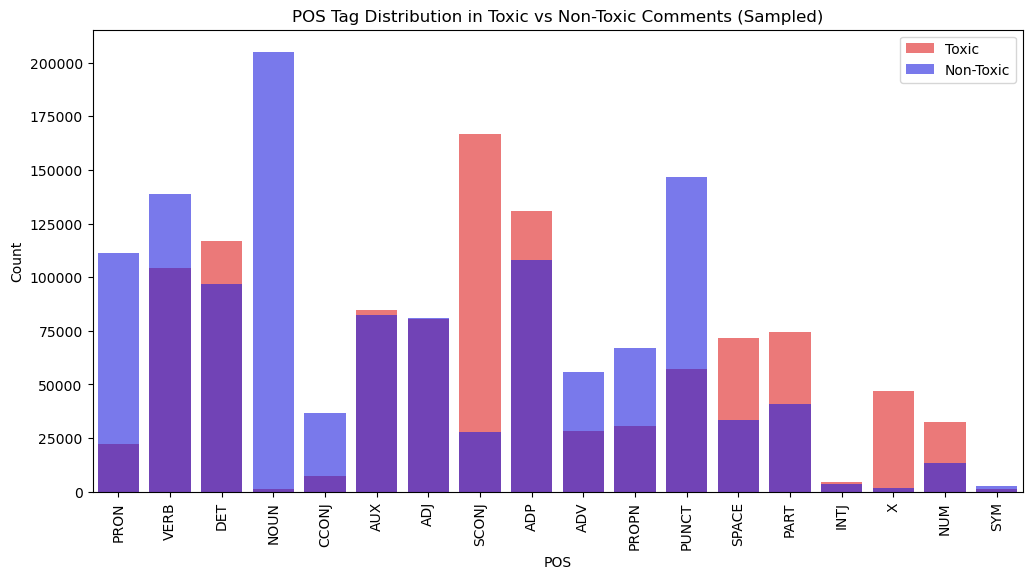

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(data=toxic_pos_df, x='POS', y='Count', color='red', alpha=0.6, label='Toxic')
sns.barplot(data=non_toxic_pos_df, x='POS', y='Count', color='blue', alpha=0.6, label='Non-Toxic')
plt.title('POS Tag Distribution in Toxic vs Non-Toxic Comments (Sampled)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

- Although the data used here for POS Tagging is random sampled, I'm pretty sure that the distribution would change if the entire set of toxic and non toxic comments was considered for this analysis.
- However, one major analysis which I think is valid is that toxic comments are more likely to contain words that do not fall into any specific category (denoted by X), probably because toxic messages are more likely to contain short forms, slang words, typos and so on which may not always be grammatically correct.